<a href="https://colab.research.google.com/github/JeffChanSZ/Assignment-COS30020/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!mkdir -p "/content/gdrive/My Drive/workdir"
%cd  "/content/gdrive/My Drive/workdir"

/content/gdrive/My Drive/workdir


In [154]:
import pandas as pd
import numpy as np

In [155]:
#df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/sentiment140_twitterdata.csv",
#                names=['polarity', 'id', 'date', 'query', 'user', 'text'],
#                encoding='latin-1')

#df = pd.read_csv("testdata.csv",
#                names=['textID', 'tweet_text', 'sentiment'],
#               encoding='latin-1')
df = pd.read_csv("testdata.csv")
df.head()

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1981044516,working on these hundreds of photos is so tiri...,positive,"['work', 'hundr', 'photo', 'tire', 'good', 'mo...",1
1,1989636430,Summer at last.. Going to school.,positive,"['summer', 'last', 'go', 'school']",1
2,2255615047,@jamespetergates whats wrong jamesyface?,negative,"['wrong', 'jamesyfac']",0
3,1975771088,Out with our friends at Olive Garden - I haven...,positive,"['friend', 'oliv', 'garden', 'not', 'mm']",1
4,1822612935,"@IIIooo Hello there, how are you? You should ...",positive,"['hello', 'find', 'us', 'myspac', 'music', 'ad...",1


In [156]:
#df.polarity = df.polarity.replace({0: "negative", 4: "positive"})
#df.polarity.value_counts()
df.sentiment = df.sentiment.astype(str)
df.sentiment = df.sentiment.replace({'0': 'negative', '4': 'positive'})
df.sentiment.value_counts()

negative    250101
positive    249899
Name: sentiment, dtype: int64

In [ ]:
df = df.iloc[1:]

In [ ]:
df.head()

,sentiment,textID,date,query,user,tweet_text
1,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
5,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df.drop(columns=['date', 'query', 'user'])
df.head()

,sentiment,textID,tweet_text
1,negative,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,negative,1467810672,is upset that he can't update his Facebook by ...
3,negative,1467810917,@Kenichan I dived many times for the ball. Man...
4,negative,1467811184,my whole body feels itchy and like its on fire
5,negative,1467811193,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df[["textID", "tweet_text", "sentiment"]]
df.head()

,textID,tweet_text,sentiment
1,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
2,1467810672,is upset that he can't update his Facebook by ...,negative
3,1467810917,@Kenichan I dived many times for the ball. Man...,negative
4,1467811184,my whole body feels itchy and like its on fire,negative
5,1467811193,"@nationwideclass no, it's not behaving at all....",negative


In [149]:
df = df.sample(n=500000)
df.sentiment.value_counts()

negative    250101
positive    249899
Name: sentiment, dtype: int64

In [150]:
df.to_csv("testdata.csv", index=False)

In [151]:
import matplotlib.pyplot as plt

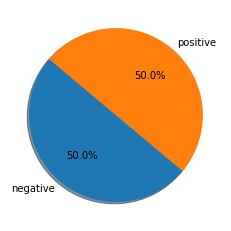

In [157]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [158]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 249899
Number of - tweets: 250101


In [159]:
from wordcloud import WordCloud

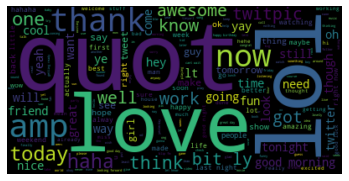

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

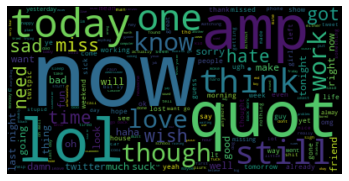

In [ ]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [160]:
import re

In [ ]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

In [161]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


In [162]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


In [ ]:
pip install emoji --upgrade

     |████████████████████████████████| 175 kB 28.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=423c45647332141db01a483dc225b7b4dcabe2e6b6ee570c7b34349d894b1fe4
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji

In [163]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


In [164]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


In [165]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

In [166]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


In [167]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


In [168]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


In [ ]:
pip install contractions

     |████████████████████████████████| 287 kB 35.8 MB/s 
     |████████████████████████████████| 106 kB 62.7 MB/s 


In [169]:
import contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [170]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


In [171]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweet = "These are 5 different words!"

In [172]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [173]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['Going', 'to', 'visit', 'my', 'cousin', "'s", 'fan-club', 'She', 'worked', 'so', 'hard', 'on', 'it', '!']


In [ ]:
import string

In [174]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [175]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'hers', 've', 'what', 'couldn', 'all', 'needn', "didn't", 'theirs', 'which', 'on', "aren't", 'was', 'that', 'down', "weren't", "isn't", 'haven', 'd', 'into', 'you', 'if', 'hasn', 'of', 'before', 'i', "wouldn't", 'our', 'll', 'here', 'why', 'such', 'where', 'they', 'during', 'more', 'didn', 'each', 'than', 't', "it's", 'these', 'myself', 'again', 'we', 'yours', 'to', 'don', 'me', 'in', "shan't", "wasn't", 'out', 'both', 'aren', 'mustn', 'after', 'he', 'up', "hadn't", "haven't", 's', 'whom', 'ma', 'nor', "shouldn't", 'are', 'his', 'your', 'do', 'does', 'with', 'very', 're', 'as', 'himself', 'yourselves', 'own', 'no', 'few', 'isn', 'too', 'my', "don't", "you've", 'had', 'against', 'will', 'by', 'but', 'is', 'further', 'o', 'the', 'were', 'yourself', 'hadn', 'it', "won't", 'having', 'have', 'should', "that'll", 'those', 'has', 'now', "you're", 'an', 'once', 'so', 'when', 'only', 'off', 'been', 'won', 'wouldn', 'itself', 'themselves', 'and', 'how', 'him', 'most', "couldn't", 'under', 'wasn

In [177]:
stop_words.discard('not')
print(stop_words)

{'hers', 've', 'what', 'couldn', 'all', 'needn', "didn't", 'theirs', 'which', 'on', "aren't", 'was', 'that', 'down', "weren't", "isn't", 'haven', 'd', 'into', 'you', 'if', 'hasn', 'of', 'before', 'i', "wouldn't", 'our', 'll', 'here', 'why', 'such', 'where', 'they', 'during', 'more', 'didn', 'each', 'than', 't', "it's", 'these', 'myself', 'again', 'we', 'yours', 'to', 'don', 'me', 'in', "shan't", "wasn't", 'out', 'both', 'aren', 'mustn', 'after', 'he', 'up', "hadn't", "haven't", 's', 'whom', 'ma', 'nor', "shouldn't", 'are', 'his', 'your', 'do', 'does', 'with', 'very', 're', 'as', 'himself', 'yourselves', 'own', 'no', 'few', 'isn', 'too', 'my', "don't", "you've", 'had', 'against', 'will', 'by', 'but', 'is', 'further', 'o', 'the', 'were', 'yourself', 'hadn', 'it', "won't", 'having', 'have', 'should', "that'll", 'those', 'has', 'now', "you're", 'an', 'once', 'so', 'when', 'only', 'off', 'been', 'won', 'wouldn', 'itself', 'themselves', 'and', 'how', 'him', 'most', "couldn't", 'under', 'wasn

In [178]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [ ]:
tweet = "these are 5 different words!"

In [ ]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokens = ["manager", "management", "managing"]

In [179]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [180]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [181]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

In [182]:
lemmatizer = WordNetLemmatizer()

In [183]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [184]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

In [185]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [186]:
import random

In [187]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: @imraw88 Lebron is just the next Dominique Wilkins with the rate his teams are performing in the playoffs....or worse next Ewing...sad 
Post Twitter processing tweet:  Lebron is just the next Dominique Wilkins with the rate his teams are performing in the playoffs....or worse next Ewing...sad 
Post Word processing tweet:  lebron is just the next dominique wilkins with the rate his teams are performing in the playoffs.or worse next ewing.sad 
['lebron', 'next', 'dominiqu', 'wilkin', 'rate', 'team', 'perform', 'wors', 'next']


Initial tweet: Waiting for my train back home for summer 
Post Twitter processing tweet: Waiting for my train back home for summer 
Post Word processing tweet: waiting for my train back home for summer 
['wait', 'train', 'back', 'home', 'summer']


Initial tweet: @JReedOSU I miss her 
Post Twitter processing tweet:  I miss her 
Post Word processing tweet:  i miss her 
['miss']


Initial tweet: oh my gossh ! @mileycyrus vote for you !  always !
Post 

In [ ]:
pip install -U scikit-learn

In [188]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1981044516,working on these hundreds of photos is so tiri...,positive,"[work, hundr, photo, tire, good, morn, far, th...",1
1,1989636430,Summer at last.. Going to school.,positive,"[summer, last, go, school]",1
2,2255615047,@jamespetergates whats wrong jamesyface?,negative,"[wrong, jamesyfac]",0
3,1975771088,Out with our friends at Olive Garden - I haven...,positive,"[friend, oliv, garden, not, mm]",1
4,1822612935,"@IIIooo Hello there, how are you? You should ...",positive,"[hello, find, us, myspac, music, add, us]",1
5,2068332771,"@mindi_li just starting mine, i hope so",positive,"[start, mine, hope]",1
6,2013874599,@claudia10 http://twitpic.com/6ilgr - Ah well...,negative,"[ah, well, like, top]",0
7,2266179149,at the airport. i dont want to go home!,negative,"[airport, not, want, go, home]",0
8,1984262540,"@amayzin You're such a sweetheart, I'm sure yo...",positive,"[sweetheart, sure, manag, shine, fine, back, d...",1
9,1826561606,What a beautiful day today! Out to plant flow...,positive,"[beauti, day, today, plant, flower]",1


In [190]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [191]:
print(X)
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [192]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

In [193]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

In [194]:
freqs = build_freqs(corpus, sentiment)

In [195]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [196]:
freqs_all = build_freqs(X, y)

In [197]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 19461
Frequency of word 'love' in - tweets: 6979


In [198]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [199]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


In [200]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[19461.  6980.]


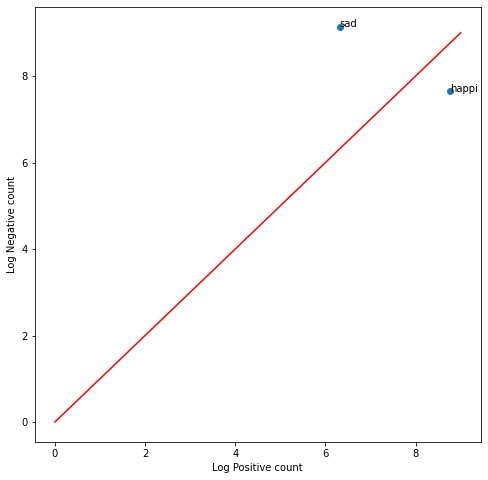

In [201]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

In [202]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

In [204]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [205]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [206]:
ft = cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [207]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [208]:
cv_mtx = cv_vect.transform(corpus)

In [209]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [210]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [211]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [212]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [213]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [215]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [216]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [217]:
ft = tf_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [218]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [219]:
print(tf_mtx.shape)

(6, 13)


In [220]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [221]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

In [222]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [223]:
print(X)
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

In [226]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 400000
Size of y_train: 400000


Size of X_test: 100000
Size of y_test: 100000


Train proportion: 80%


In [227]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['love', 'someon', 'love', 'not', 'see', 'anymor']
Sentiment: 0


In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

In [230]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

In [231]:
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 8.32676441e-05 -6.04738325e-05]] [2.14289989e-09]


In [232]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [233]:
model_lr_cv = fit_lr(X_train_cv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [234]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [235]:
model_lr_tf = fit_lr(X_train_tf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [236]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [237]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [238]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 69.44%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

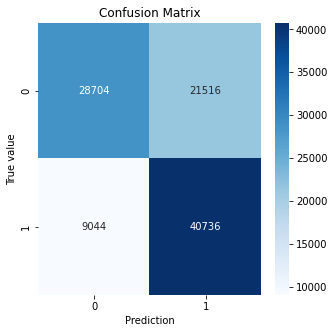

In [239]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

In [240]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [241]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 77.51%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

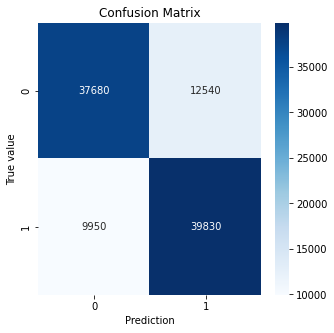

In [242]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

In [243]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [244]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 77.94%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

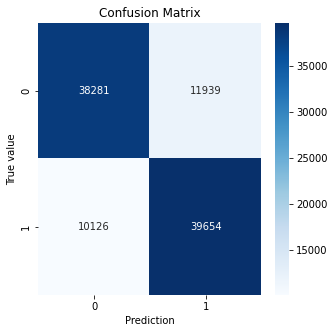

In [245]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [260]:
your_tweet = """RT @AIOutsider: i love this course
And don't forget to visit https://AIOutsider.com ..."""

In [261]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [262]:
predict_tweet(your_tweet)

'Prediction is positive sentiment'